In [87]:
# import stuff
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

In [88]:
# load data from csv files
ee_events = pd.read_csv("electron.csv", sep=";", decimal=",")
mm_events = pd.read_csv("muon.csv", sep=";", decimal=",")
tt_events = pd.read_csv("tau.csv", sep=";", decimal=",")
hh_events = pd.read_csv("hadron.csv", sep=";", decimal=",")

# store data also in dictionary to allow simple for loops
dic_events = {"electron": ee_events, "muon": mm_events, "tau": tt_events, "hadron": hh_events}

In [89]:
# create scatter plot from the given axes (optionally excluding some data)
def scatter_plot(ax1, ax2, exclude=[]):
    for name, events in dic_events.items():
        if not (name in exclude):
            plt.plot(events[ax1], events[ax2], ".", label=name)
    
    plt.xlabel(ax1)
    plt.ylabel(ax2)
    plt.legend()
    plt.grid()

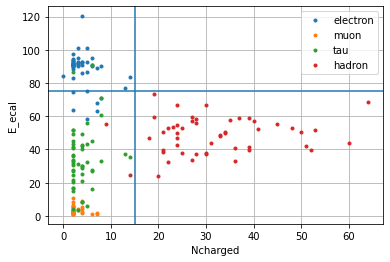

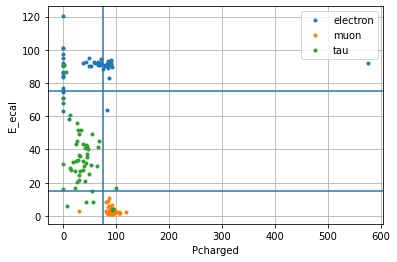

In [90]:
scatter_plot("Ncharged", "E_ecal")
plt.axvline(15)
plt.axhline(75)
plt.show()

scatter_plot("Pcharged", "E_ecal", exclude="hadron")
plt.axvline(75)
plt.axhline(15)
plt.axhline(75)
plt.show()

#### First proposals for discrimination cuts:
1. Hadron events can be discriminated by requiring ``Ncharged >= 15``
1. Electron events can be discriminated by requiring ``Ncharged < 15; E_ecal >= 75``
1. Muon events can be discriminated by requiring ``Ncharged < 15; E_ecal < 15; Pcharged >= 75``
1. Tau events can be discriminated by requiring ``Ncharged < 15; E_ecal >= 15; E_ecal < 60``